<a href="https://colab.research.google.com/github/khushii812-2/Data-Science-Handouts-/blob/main/7.%20Clinical_Data_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#generating synthetic EHR-like dataset
np.random.seed(42)
n_samples=200
ehr_data= pd.DataFrame({
    'age': np.random.randint(30, 80, size=n_samples),
    'gender': np.random.choice(['male', 'female'], size=n_samples),
    'blood_pressure': np.random.randint(80, 120, size=n_samples),
    'heart_rate': np.random.randint(60, 100, size=n_samples),
    'diagnosis': np.random.choice([0, 1], size= n_samples)
})

In [ ]:
#generated dataset
print(ehr_data.head())
print (ehr_data.info())
print (ehr_data.describe())

   age  gender  blood_pressure  heart_rate  diagnosis
0   68    male              84          79          1
1   58    male              98          84          1
2   44  female              83          81          1
3   72  female             114          72          1
4   37  female              96          78          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             200 non-null    int64 
 1   gender          200 non-null    object
 2   blood_pressure  200 non-null    int64 
 3   heart_rate      200 non-null    int64 
 4   diagnosis       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
              age  blood_pressure  heart_rate   diagnosis
count  200.000000      200.000000  200.000000  200.000000
mean    54.260000      101.165000   79.225000    0.500000
std     14.229716       11.456616  

In [ ]:
#Introducing missing value
mask= np.random.rand(n_samples)<0.2
ehr_data.loc[mask, 'cholesterol']= np.nan
mask= np.random.rand(n_samples)<0.1
ehr_data.loc[mask, 'blood_pressure']= np.nan

In [ ]:
#watch data set after introducting missing values
print("\nDataset after introducing missing values:")
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.describe())
print(ehr_data.isnull().sum())


Dataset after introducing missing values:
   age  gender  blood_pressure  heart_rate  diagnosis  cholesterol
0   68    male            84.0          79          1          NaN
1   58    male            98.0          84          1          NaN
2   44  female            83.0          81          1          NaN
3   72  female           114.0          72          1          NaN
4   37  female            96.0          78          1          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    int64  
 1   gender          200 non-null    object 
 2   blood_pressure  180 non-null    float64
 3   heart_rate      200 non-null    int64  
 4   diagnosis       200 non-null    int64  
 5   cholesterol     0 non-null      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB
None
              age  blood

In [ ]:
imputer = KNNImputer(n_neighbors=5)
ehr_data[['cholesterol', 'blood_pressure']]
imputer.fit_transform(ehr_data[['cholesterol', 'blood_pressure']])

array([[ 84. ],
       [ 98. ],
       [ 83. ],
       [114. ],
       [ 96. ],
       [107. ],
       [107.6],
       [108. ],
       [ 85. ],
       [114. ],
       [116. ],
       [103. ],
       [108. ],
       [110. ],
       [114. ],
       [112. ],
       [100. ],
       [111. ],
       [102. ],
       [112. ],
       [ 82. ],
       [ 97. ],
       [104. ],
       [110. ],
       [ 82. ],
       [119. ],
       [103. ],
       [111. ],
       [101. ],
       [102. ],
       [ 81. ],
       [106. ],
       [ 81. ],
       [105. ],
       [ 96. ],
       [101.8],
       [112. ],
       [ 88. ],
       [118. ],
       [108. ],
       [105. ],
       [114. ],
       [104. ],
       [103. ],
       [ 92. ],
       [ 86. ],
       [115. ],
       [ 99. ],
       [106.6],
       [ 87. ],
       [ 95. ],
       [ 93. ],
       [ 91. ],
       [102. ],
       [ 94. ],
       [107. ],
       [113. ],
       [ 81. ],
       [111. ],
       [102. ],
       [101. ],
       [104. ],
       [

In [ ]:
#watch dataset after imputation
print("\nDataset after imputation:")
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.describe())
print(ehr_data.isnull().sum())


Dataset after imputation:
    age  gender  blood_pressure  heart_rate  diagnosis  cholesterol
0  68.0    male            84.0        79.0        1.0          NaN
1  58.0    male            98.0        84.0        1.0          NaN
2  44.0  female            83.0        81.0        1.0          NaN
3  72.0  female           114.0        72.0        1.0          NaN
4  37.0  female            96.0        78.0        1.0          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    float64
 1   gender          200 non-null    object 
 2   blood_pressure  182 non-null    float64
 3   heart_rate      200 non-null    float64
 4   diagnosis       200 non-null    float64
 5   cholesterol     0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 9.5+ KB
None
              age  blood_pressure  heart_rat

In [ ]:
#Encode categorical feature
label_encoder= LabelEncoder()
ehr_data['gender']= label_encoder.fit_transform(ehr_data['gender'])

In [ ]:
#watch dataset after encoding
print("\nDataset after encoding:")
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.describe())
print(ehr_data.isnull().sum())


Dataset after encoding:
    age  gender  blood_pressure  heart_rate  diagnosis  cholesterol
0  68.0       1            84.0        79.0        1.0          NaN
1  58.0       1            98.0        84.0        1.0          NaN
2  44.0       0            83.0        81.0        1.0          NaN
3  72.0       0           114.0        72.0        1.0          NaN
4  37.0       0            96.0        78.0        1.0          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    float64
 1   gender          200 non-null    int64  
 2   blood_pressure  182 non-null    float64
 3   heart_rate      200 non-null    float64
 4   diagnosis       200 non-null    float64
 5   cholesterol     0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB
None
              age     gender  blood_pressure  he

In [ ]:
#encode categorical variables
ehr_data['gender']= LabelEncoder().fit_transform(ehr_data['gender'])

In [ ]:
##Impute missing values using KNNImputer
# Check for columns with all nulls
print(ehr_data.isnull().all())

# Drop them before imputing (if needed)
ehr_data = ehr_data.dropna(axis=1, how='all')

# Make sure only numeric columns are passed to imputer
ehr_data = ehr_data.select_dtypes(include=['float64', 'int64'])

# Now safe to impute
imputer = KNNImputer(n_neighbors=5)
ehr_imputed = pd.DataFrame(imputer.fit_transform(ehr_data), columns=ehr_data.columns)


age               False
gender            False
blood_pressure    False
heart_rate        False
diagnosis         False
dtype: bool


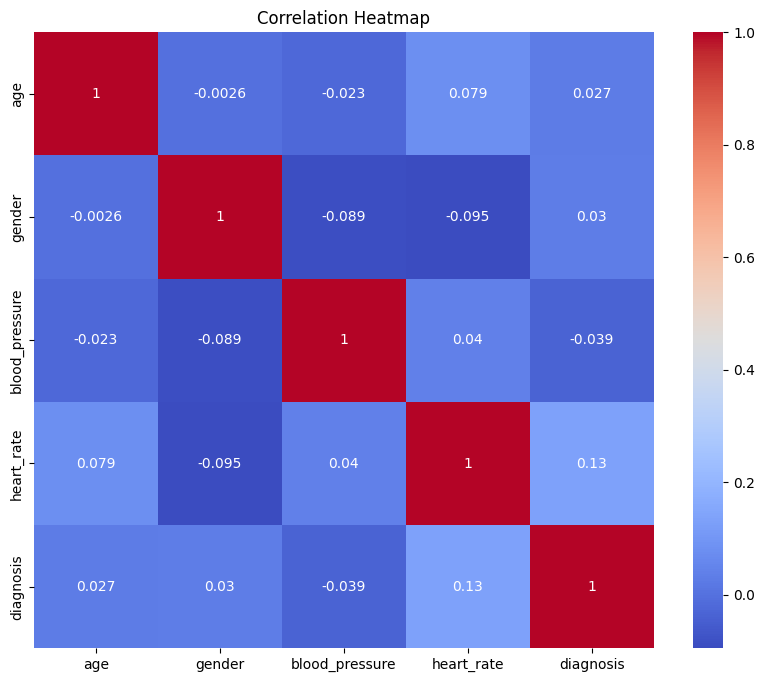

In [ ]:
#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(ehr_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#feature-target split
x= ehr_data.drop('diagnosis', axis=1)
y= ehr_data['diagnosis']

In [ ]:
#train-test split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#look dataset again
print(ehr_data.head())
print(ehr_data.info())
print(ehr_data.describe())
print(ehr_data.isnull().sum())

    age  gender  blood_pressure  heart_rate  diagnosis
0  68.0       1            84.0        79.0        1.0
1  58.0       1            98.0        84.0        1.0
2  44.0       0            83.0        81.0        1.0
3  72.0       0           114.0        72.0        1.0
4  37.0       0            96.0        78.0        1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             200 non-null    float64
 1   gender          200 non-null    int64  
 2   blood_pressure  182 non-null    float64
 3   heart_rate      200 non-null    float64
 4   diagnosis       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
              age     gender  blood_pressure  heart_rate   diagnosis
count  200.000000  200.00000      182.000000  200.000000  200.000000
mean    54.260000    0.45500      100.768132   79.225000  

In [ ]:
# train a classifier
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)
#evaluate the model
y_pred= clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.43      0.47        23
         1.0       0.35      0.41      0.38        17

    accuracy                           0.42        40
   macro avg       0.42      0.42      0.42        40
weighted avg       0.44      0.42      0.43        40



In [ ]:
#feature importance visualization
importances= clf.feature_importances_
features= x.columns
indices= np.argsort(importances)[::-1]

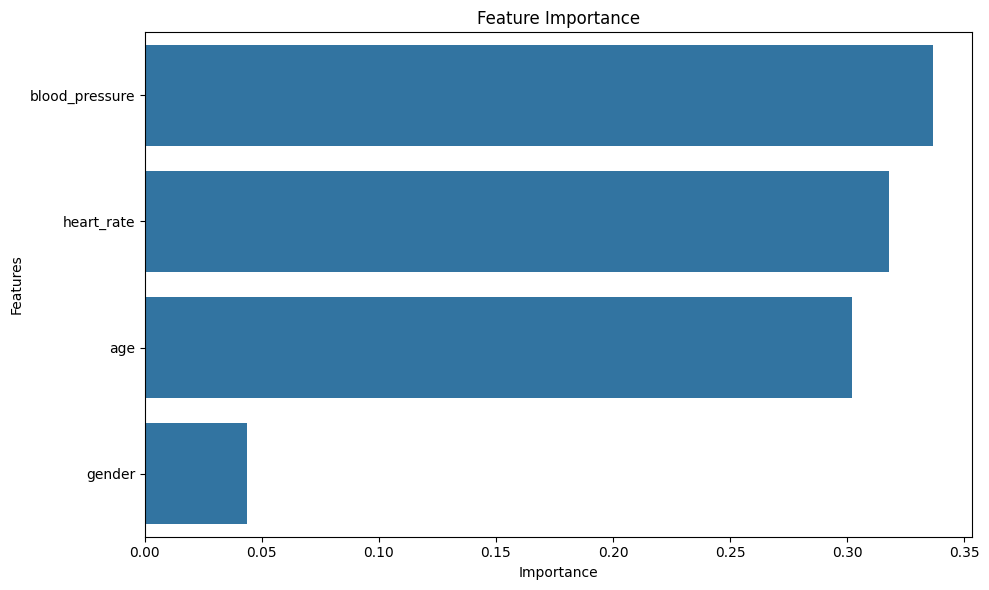

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices]),
palette="magma"
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

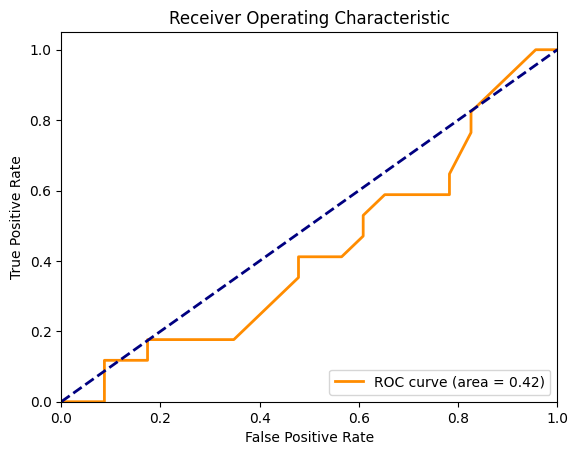

In [ ]:
#Roc curve
from sklearn.metrics import roc_curve, auc
probs= clf.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds= roc_curve(y_test, probs)
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()